# check results with EDR3

In [1]:
import sys
sys.path.append('/home/math/Documents/Research/codes/plotFunc/')
from MESAreader import *
import matplotlib.pyplot as plt
from plotDefaults import *
from astropy import units as u

In [2]:
set_plotDefaults()

done in plotDefaults.py


In [3]:
R136_02data = "/home/math/Documents/Research/Projects/vfts682/EDR3/R136_0.2deg.data"
R136_005data = "/home/math/Documents/Research/Projects/vfts682/EDR3/R136_0.05deg.data"
VFTS682_data = "/home/math/Documents/Research/Projects/vfts682/EDR3/VFTS682.data"

In [4]:
def getSrcCol(fname):
    with open(fname, "r") as f:
        for i, line in enumerate(f):
            if i == 0:
                col = line.split(',')
                # print(col)
                break
    src = np.genfromtxt(fname, skip_header=1, delimiter=",")
    return src, col        

In [22]:
# load data
def get_position(fname):
    src, col = getSrcCol(fname)
    # the magnitude cut is applied in the Gaia catalog query
    # G = src[:, col.index("phot_g_mean_mag")]
    # i_bright = G <= 17 #VFTS cutoff
    # print(min(i_bright))
    try:
        ra_error = src[:, col.index("ra_error")]*1e-3*u.arcsec
        dec_error = src[:, col.index("dec_error")]*1e-3*u.arcsec
        ra = src[:, col.index("ra")]*u.deg
        dec = src[:, col.index("dec")]*u.deg
    except:
        ra_error = src[col.index("ra_error")]*1e-3*u.arcsec
        dec_error = src[col.index("dec_error")]*1e-3*u.arcsec
        ra = src[col.index("ra")]*u.deg
        dec = src[col.index("dec")]*u.deg
    return ra, ra_error, dec, dec_error

# test
# print(get_position(R136_02data))


def get_pm_components(fname):
    src, col = getSrcCol(fname)
    try:
        pmra_error = src[:, col.index("pmra_error")]*1e-3*u.arcsec/u.yr
        pmdec_error = src[:, col.index("pmdec_error")]*1e-3*u.arcsec/u.yr
        pmra = src[:, col.index("pmra")]*1e-3*u.arcsec/u.yr
        pmdec = src[:, col.index("pmdec")]*1e-3*u.arcsec/u.yr
    except:
        pmra_error = src[col.index("pmra_error")]*1e-3*u.arcsec/u.yr
        pmdec_error = src[col.index("pmdec_error")]*1e-3*u.arcsec/u.yr
        pmra = src[col.index("pmra")]*1e-3*u.arcsec/u.yr
        pmdec = src[col.index("pmdec")]*1e-3*u.arcsec/u.yr
    return pmra, pmra_error, pmdec, pmdec_error

# test
# print(get_pm_components(R136_02data))


Text(0, 0.5, 'DEC (J2000)')

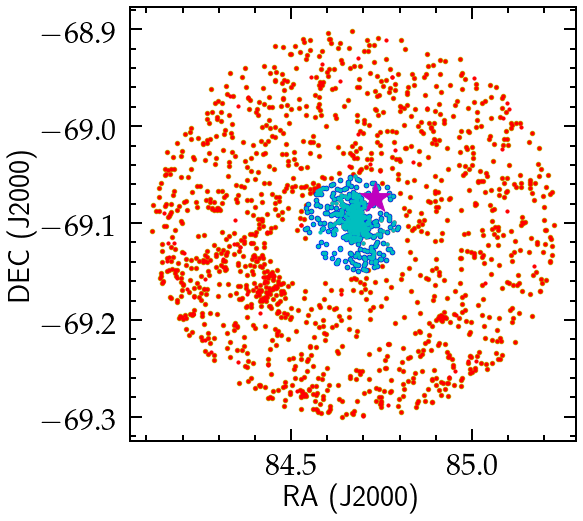

In [26]:
fig = plt.figure()
gs = gridspec.GridSpec(100,100) 
ax = plt.subplot(gs[:,:])

# 0.2 degrees around R136
ra, ra_error, dec, dec_error = get_position(R136_02data)
pmra, pmra_error, pmdec, pmdec_error = get_pm_components(R136_02data)
i_small_err = (pmra_error <=0.1*1e-3*u.arcsec/u.yr) & (pmdec_error<=0.1*1e-3*u.arcsec/u.yr) #mas/yr
ax.scatter(ra[i_small_err], dec[i_small_err], c='y', s=20, label=r"small err")
ax.scatter(ra, dec, color='r', s=10, label="G<17")

# 0.05 degrees around R136
ra, ra_error, dec, dec_error = get_position(R136_005data)
pmra, pmra_error, pmdec, pmdec_error = get_pm_components(R136_005data)
i_small_err = (pmra_error <=0.1*1e-3*u.arcsec/u.yr) & (pmdec_error<=0.1*1e-3*u.arcsec/u.yr) #mas/yr
ax.scatter(ra[i_small_err], dec[i_small_err], c='b', s=20, label=r"small err")
ax.scatter(ra, dec, color='c', s=10, label="G<17")


# VFTS682
ra, ra_error, dec, dec_error = get_position(VFTS682_data)
ax.scatter(ra, dec, s=1000, marker="*", c="m")

ax.set_xlabel("RA (J2000)")
ax.set_ylabel("DEC (J2000)")

Text(0, 0.5, 'absolute pmdec \\ [arcs/yr]')

/home/math/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  func(*args, **kwargs)


/home/math/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.canvas.print_figure(bytes_io, **kw)


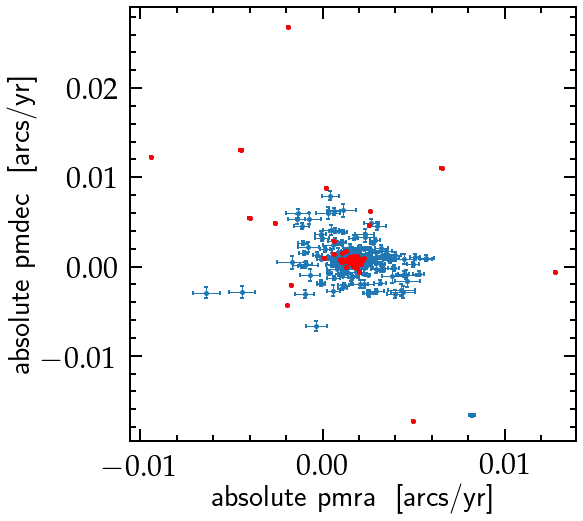

In [43]:
# plot proper motions
fig = plt.figure()
gs = gridspec.GridSpec(100,100) 
ax = plt.subplot(gs[:,:])

ra, ra_error, dec, dec_error = get_position(R136_005data)
pmra, pmra_error, pmdec, pmdec_error = get_pm_components(R136_005data)
i_small_err = (pmra_error <=0.1*1e-3*u.arcsec/u.yr) & (pmdec_error<=0.1*1e-3*u.arcsec/u.yr) #mas/yr
# print(np.sum(i_small_err))

# ax.scatter(pmra, pmdec)
ax.errorbar(pmra.value, pmdec.value, xerr=pmra_error.value, yerr=pmdec_error.value, lw=1, fmt='.')
ax.errorbar(pmra[i_small_err].value, pmdec[i_small_err].value, xerr=pmra_error[i_small_err].value, yerr=pmdec_error[i_small_err].value, lw=1, fmt='.', c='r')

# pmra, pmra_error, pmdec, pmdec_error = get_pm_components(VFTS682_data)
# ax.errorbar(pmra, pmdec, xerr=pmra_error, yerr=pmdec_error, fmt="*", c='m')

ax.set_xlabel("absolute pmra \ [arcs/yr]")
ax.set_ylabel("absolute pmdec \ [arcs/yr]")
# ax.set_xlim(-5, 5)
# ax.set_ylim(-5, 5)

# Calculate average motion of R136

In [42]:
# get data
pmra, pmra_error, pmdec, pmdec_error = get_pm_components(R136_005data)
ra, ra_error, dec, dec_error = get_position(R136_005data)
print("# stars:", len(pmra))
# dirty fix for missing data
not_nans = np.logical_not(np.isnan(pmra_error)) & np.logical_not(np.isnan(pmdec_error)) & np.logical_not(np.isnan(pmdec)) & np.logical_not(np.isnan(pmra))
pmra        = pmra[not_nans]
pmra_error  = pmra_error[not_nans]
pmdec       = pmdec[not_nans]
pmdec_error = pmdec_error[not_nans]
ra          = ra[not_nans]
ra_error    = ra_error[not_nans]
dec         = dec[not_nans]
dec_error   = dec_error[not_nans]
print("after removing missing data", len(pmra))
# remove large errors
i_small_err = (pmra_error <=0.1*1e-3*u.arcsec/u.yr) & (pmdec_error<=0.1*1e-3*u.arcsec/u.yr) #mas/yr
pmra        = pmra[i_small_err]
pmra_error  = pmra_error[i_small_err]
pmdec       = pmdec[i_small_err]
pmdec_error = pmdec_error[i_small_err]
ra          = ra[i_small_err]
ra_error    = ra_error[i_small_err]
dec         = dec[i_small_err]
dec_error   = dec_error[i_small_err]
print("after removing large pm errors", len(pmra))

avg_pmra = np.average(pmra, weights=1.0/pmra_error**2)
avg_pmdec = np.average(pmdec, weights=1.0/pmdec_error**2)
print(avg_pmra, avg_pmdec)





# stars: 649
after removing missing data 584
after removing large pm errors 362
0.0015719258401876042 arcsec / yr 0.0006765578447890695 arcsec / yr


In [46]:
# get relative pm
pmraVFTS682, pmraVFTS682_error, pmdecVFTS682, pmdecVFTS682_error = get_pm_components(VFTS682_data)
ra, ra_error, dec, dec_error = get_position(VFTS682_data)
relative_pmra = pmraVFTS682-avg_pmra
relative_pmdec = pmdecVFTS682-avg_pmdec

print("NGC2070 average motion")
print("pmra:", avg_pmra)
print("pmdec", avg_pmdec)
print("relative motion of VFTS682")
print("pmra:", relative_pmra, "cf. Renzo+19 0.10+/-0.08")
print("pmdec", relative_pmdec, "cf. Renzo+19 0.08+/-0.10")
print("Using NGC2070 DR2 avg motion")
print("pmra:", pmraVFTS682-1.74*1e-3*u.arcsec/u.yr, "cf. Renzo+19 0.10+/-0.08")
print("pmdec", pmdecVFTS682-0.7*1e-3*u.arcsec/u.yr, "cf. Renzo+19 0.08+/-0.10")
print("------------------------------------------------------")
# relative pm amplitude
pm_rel = np.sqrt(relative_pmdec**2+np.cos(dec[0]*0.01745329)*np.cos(dec[0]*0.01745329)*relative_pmra**2)
print(pm_rel)

NGC2070 average motion
pmra: 0.0015719258401876042 arcsec / yr
pmdec 0.0006765578447890695 arcsec / yr
relative motion of VFTS682
pmra: 0.0001433251206680265 arcsec / yr cf. Renzo+19 0.10+/-0.08
pmdec 3.72784333281781e-05 arcsec / yr cf. Renzo+19 0.08+/-0.10
Using NGC2070 DR2 avg motion
pmra: -2.4749039144369295e-05 arcsec / yr cf. Renzo+19 0.10+/-0.08
pmdec 1.3836278117247583e-05 arcsec / yr cf. Renzo+19 0.08+/-0.10
------------------------------------------------------


TypeError: 'Quantity' object with a scalar value does not support indexing

649 584


Text(0, 0.5, '\\# stars')

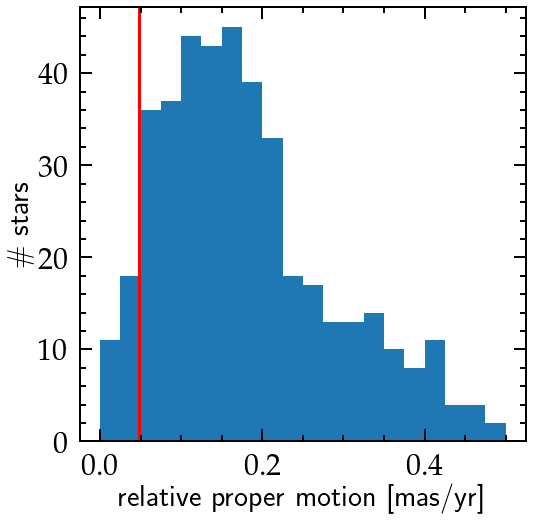

In [28]:
## relative proper motion distribution for all stars
fig = plt.figure()
gs = gridspec.GridSpec(100,100) 
ax = plt.subplot(gs[:,:])

# get data
pmra, pmra_error, pmdec, pmdec_error = get_pm_components(R136_005data)
not_nans = np.logical_not(np.isnan(pmra_error)) & np.logical_not(np.isnan(pmdec_error)) & np.logical_not(np.isnan(pmdec)) & np.logical_not(np.isnan(pmra))
print(len(pmra), np.sum(not_nans))
pmra = pmra[not_nans]
pmra_error = pmra_error[not_nans]
pmdec = pmdec[not_nans]
pmdec_error = pmdec_error[not_nans]
# calculate average
avg_pmra = np.average(pmra, weights=1.0/pmra_error)
avg_pmdec = np.average(pmdec, weights=1.0/pmdec_error)
# 
rel_pmra = pmra-avg_pmra
rel_pmdec = pmdec-avg_pmdec
# get positions
ra, ra_error, dec, dec_error = get_position(R136_005data)


rel_pm = np.sqrt(np.cos(dec[not_nans]*0.01745329)*np.cos(dec[not_nans]*0.01745329)*rel_pmra**2+rel_pmdec**2)

ax.hist(rel_pm, range=(0,0.5), bins=20)
ax.axvline(pm_rel, c='r', zorder=1)
ax.set_xlabel(r"relative proper motion [mas/yr]")
ax.set_ylabel(r"\# stars")